# 1. Read and visualise the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta



import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
country_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#checking duplicates
sum(country_df.duplicated(subset = 'country')) == 0
# No duplicate values

True

In [4]:
# basics of the df
country_df.info()

#None of the columns have inconsistent data types hence conversion is not required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Lets see the datatypes of the given data. No need to change datatypes
country_df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [6]:
# lets Check summary of the dataset 
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# lets Check info of the dataset 
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
# lets Check shape of the dataset 
country_df.shape

(167, 10)

# 2. Clean the data

In [9]:
# missing values
round(100*(country_df.isnull().sum())/len(country_df), 2)

# In our dataset we dont have any missing values. Hence, we dont need to do any imputation methods

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

# 3. Data Preparation

In [10]:
# Converting exports,imports and health spending percentages to absolute values.

country_df['exports'] = country_df['exports'] * country_df['gdpp']/100
country_df['imports'] = country_df['imports'] * country_df['gdpp']/100
country_df['health'] = country_df['health'] * country_df['gdpp']/100

country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# 4. EDA

### Univariate Analysis

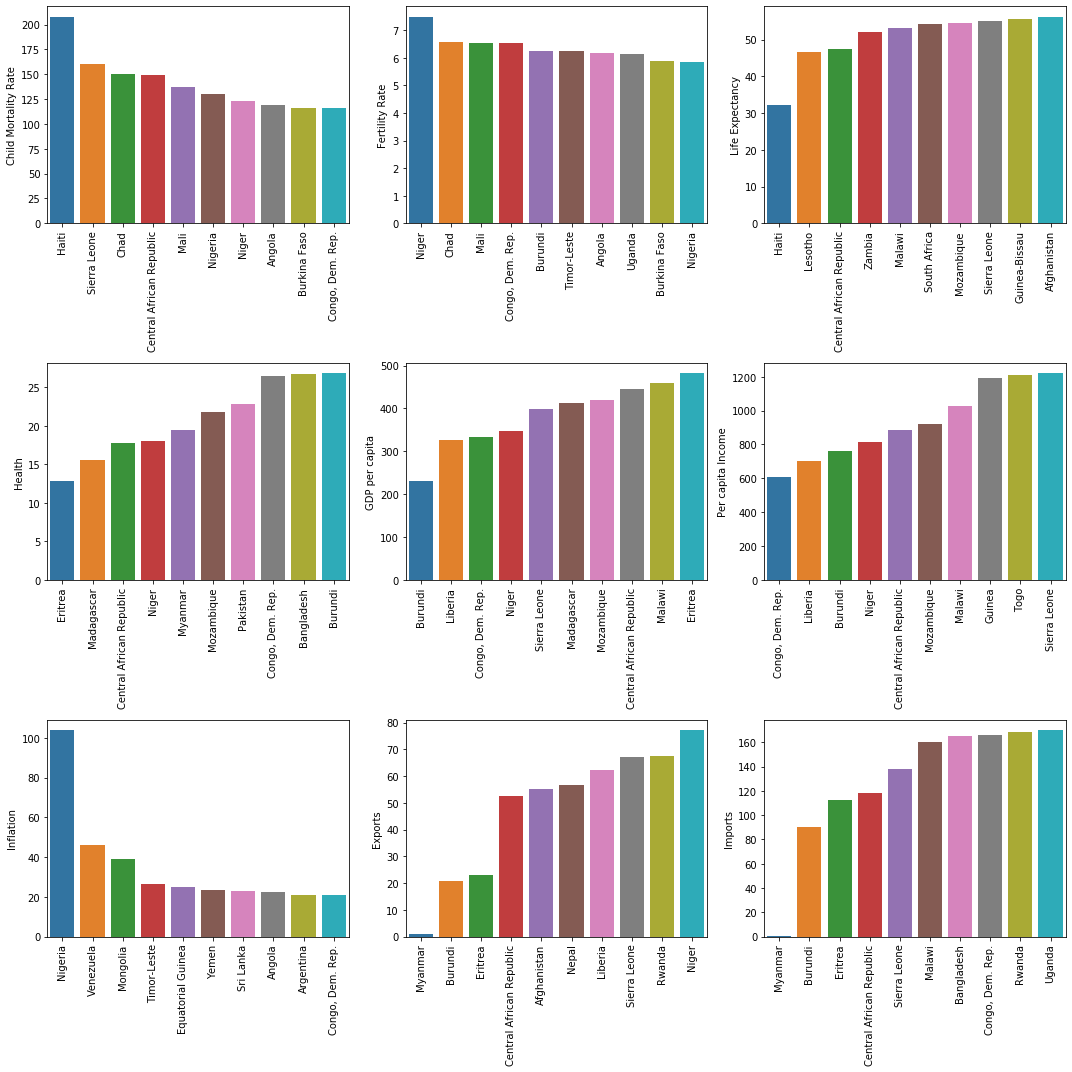

In [11]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = country_df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = country_df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = country_df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = country_df[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = country_df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = country_df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = country_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = country_df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = country_df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()


### Bivariate Analysis

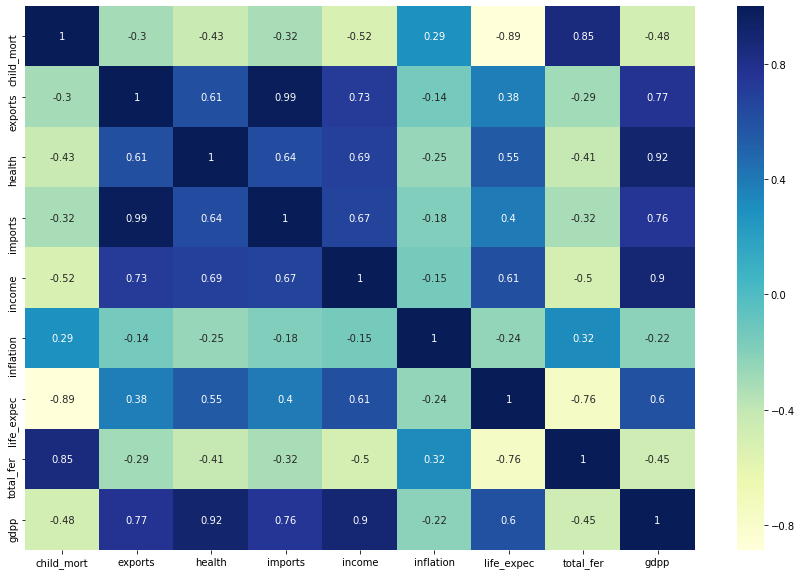

In [12]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15,10))   
ax = sns.heatmap(country_df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Inference:
- child_mortality and life_expentency are highly correlated with correlation of -0.89
- child_mortality and total_fertility are highly correlated with correlation of 0.84
- imports and exports are highly correlated with correlation of 0.75
- life_expentency and total_fertility are highly correlated with correlation of -0.76

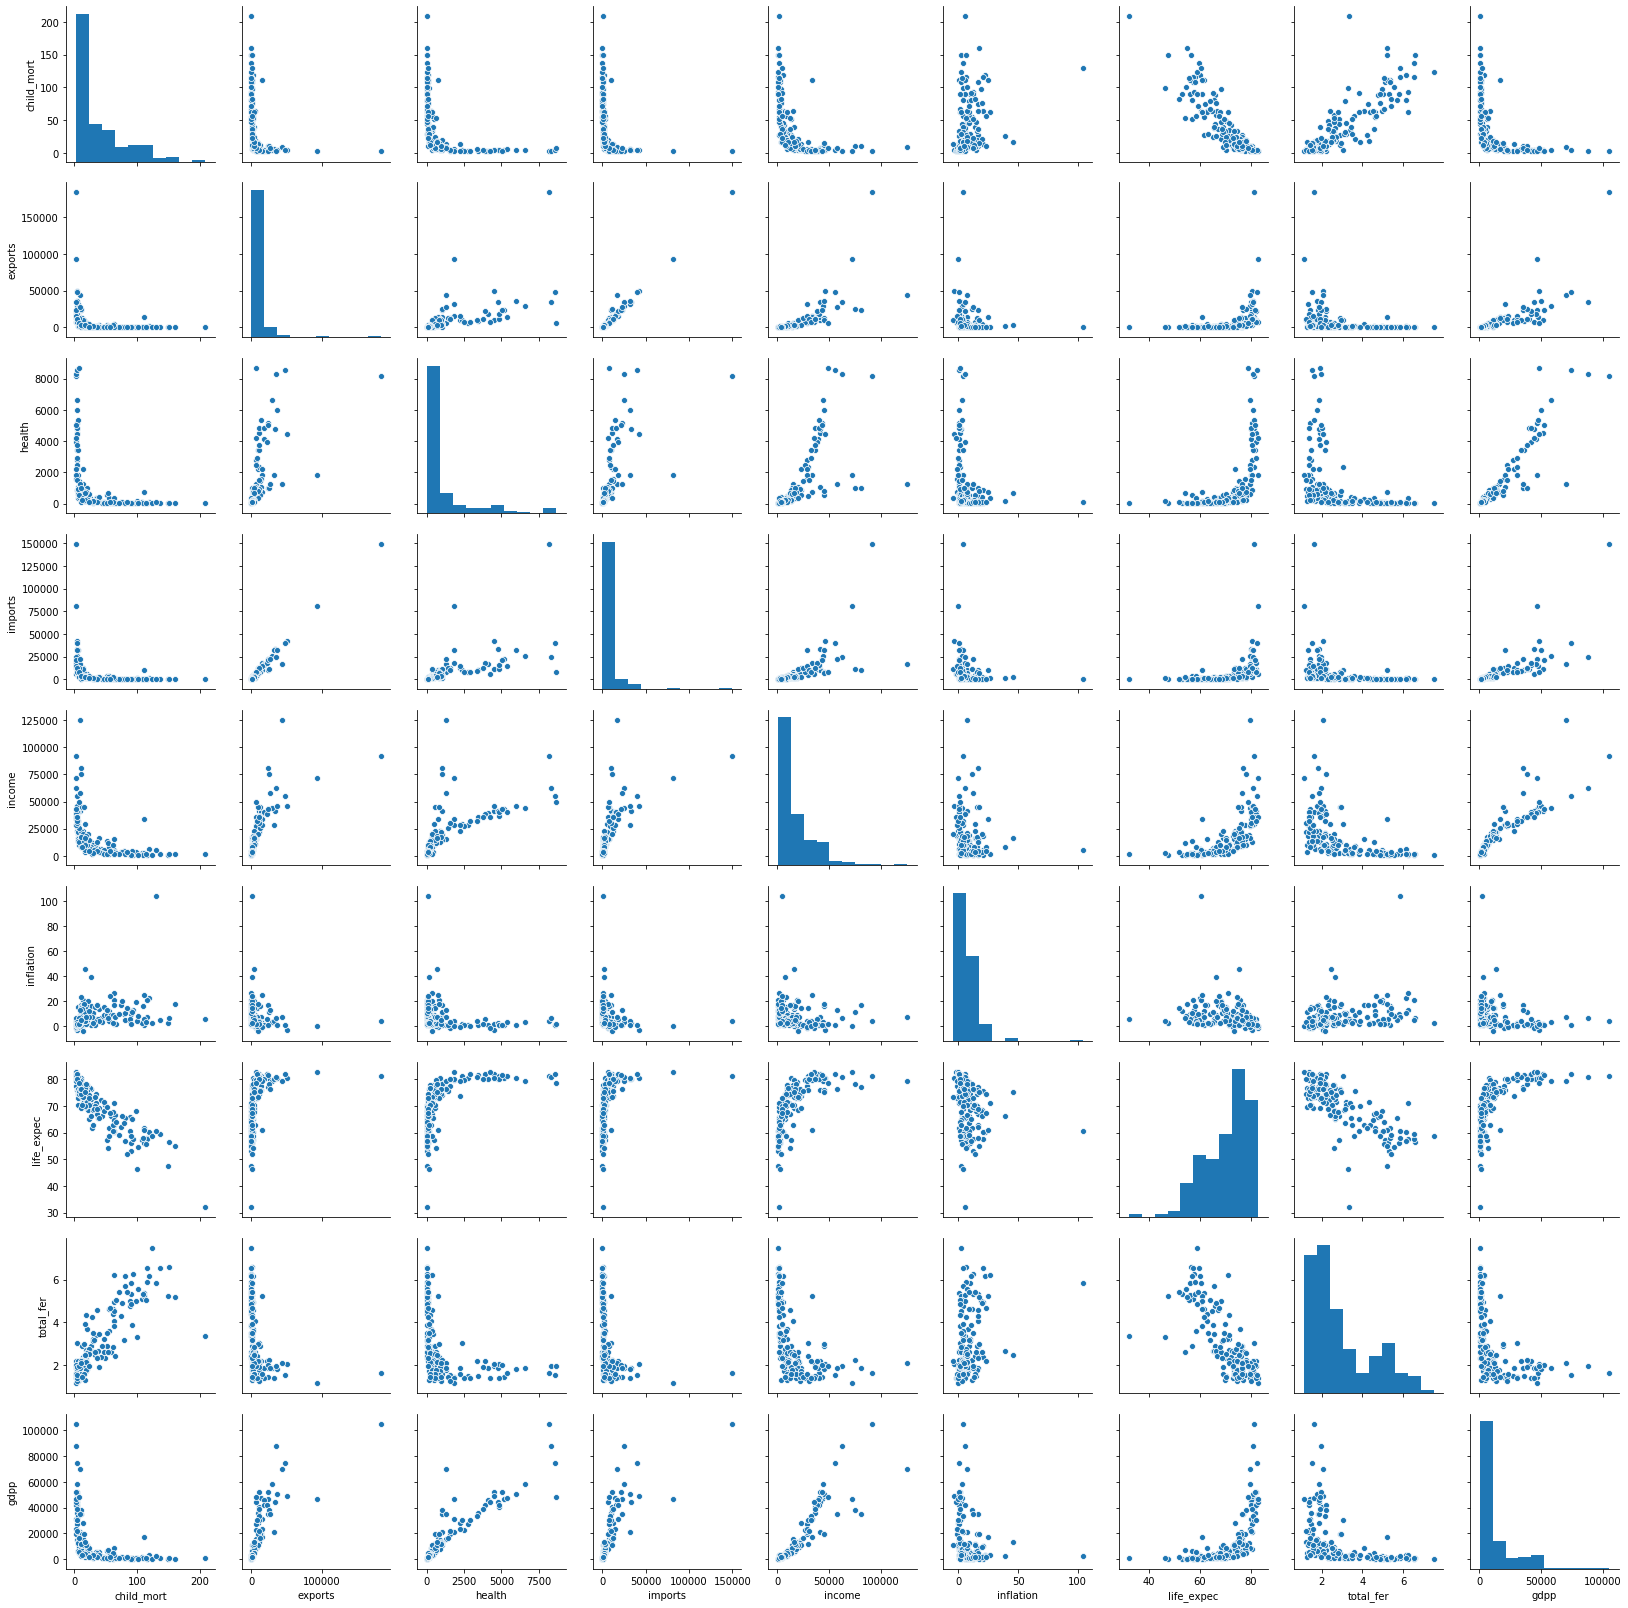

In [13]:
#Visualising Numerical data using Pairplot
sns.pairplot(country_df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']])
plt.show()

# child_mortality and life_expentency are highly correlated 
# child_mortality and total_fertility are highly correlated 
# imports and exports are highly correlated with correlation
# life_expentency and total_fertility are highly correlated 

# 5. Outlier Analysis

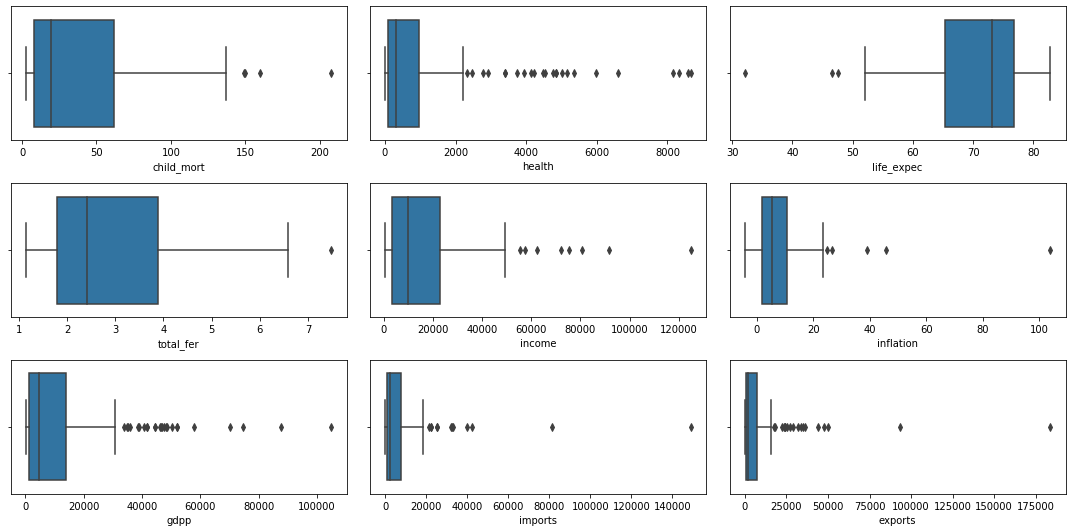

In [14]:
# We will see how values in each columns are distributed using boxplot

fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(country_df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(country_df['health'], ax = axs[0,1])
plt3 = sns.boxplot(country_df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(country_df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(country_df['income'], ax = axs[1,1])
plt6 = sns.boxplot(country_df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(country_df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(country_df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(country_df['exports'], ax = axs[2,2])


plt.tight_layout()

In [15]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [16]:
country_df.child_mort.quantile([0.5, 0.7,0.9, 0.95,0.97, 0.99, 1.0])

#child_mort has few outliers and needs to be treated. 

0.50     19.30
0.70     50.00
0.90    100.22
0.95    116.00
0.97    130.14
0.99    153.40
1.00    208.00
Name: child_mort, dtype: float64

In [17]:
country_df.exports.quantile([0.5, 0.7,0.9, 0.95, 0.99, 1.0])

# exports has few outliers and needs to be treated.

0.50      1777.44
0.70      5517.88
0.90     17760.60
0.95     31385.10
0.99     64794.26
1.00    183750.00
Name: exports, dtype: float64

In [18]:
country_df.health.quantile([0.5, 0.7,0.9, 0.95, 0.99, 1.0])

#health does not have outlier

0.50     321.8860
0.70     757.0880
0.90    3825.4160
0.95    4966.7010
0.99    8410.3304
1.00    8663.6000
Name: health, dtype: float64

In [19]:
country_df.imports.quantile([0.5, 0.7,0.9, 0.95, 0.99, 1.0])

# imports has few outliers and needs to be treated.

0.50      2045.580
0.70      5310.424
0.90     15034.280
0.95     24241.560
0.99     55371.390
1.00    149100.000
Name: imports, dtype: float64

In [20]:
country_df.income.quantile([0.5, 0.7,0.9, 0.95,0.96,0.97,0.98, 0.99, 1.0])

# income has few outliers and needs to be treated.

0.50      9960.0
0.70     19540.0
0.90     41220.0
0.95     48290.0
0.96     56256.0
0.97     62496.0
0.98     74208.0
0.99     84374.0
1.00    125000.0
Name: income, dtype: float64

In [21]:
country_df.gdpp.quantile([0.5, 0.7,0.9, 0.95,0.97, 0.99, 1.0])

# gdpp has few outliers and needs to be treated.

0.50      4660.0
0.70     11920.0
0.90     41840.0
0.95     48610.0
0.97     52218.0
0.99     79088.0
1.00    105000.0
Name: gdpp, dtype: float64

In [22]:
country_df.inflation.quantile([0.5, 0.7,0.9, 0.95, 0.99, 1.0])

# inflation has few outliers and needs to be treated.

0.50      5.390
0.70      8.964
0.90     16.640
0.95     20.870
0.99     41.478
1.00    104.000
Name: inflation, dtype: float64

In [23]:
country_df.life_expec.quantile([0.5, 0.7,0.9, 0.95, 0.99, 1.0])

#life_expec does not have outliers

0.50    73.10
0.70    76.40
0.90    80.40
0.95    81.40
0.99    82.37
1.00    82.80
Name: life_expec, dtype: float64

In [24]:
country_df.total_fer.quantile([0.5, 0.7,0.9, 0.95, 0.99, 1.0])

#total_fer does not have outliers

0.50    2.4100
0.70    3.3400
0.90    5.3220
0.95    5.8610
0.99    6.5636
1.00    7.4900
Name: total_fer, dtype: float64

# 6. Outlier Treatment

In [25]:
# As we can see there are a number of outliers in the data.


# Keeping in mind we need to identify backward countries based on socio economic and health factors.
# We will cap the outliers to values accordingly for analysis. As we do not want to remove a lot of values we have used 1 and 99 percentiles

percentiles = country_df['child_mort'].quantile([0.01,0.99]).values
country_df['child_mort'][country_df['child_mort'] <= percentiles[0]] = percentiles[0]
country_df['child_mort'][country_df['child_mort'] >= percentiles[1]] = percentiles[1]


percentiles = country_df['income'].quantile([0.01,0.99]).values
country_df['income'][country_df['income'] <= percentiles[0]] = percentiles[0]
country_df['income'][country_df['income'] >= percentiles[1]] = percentiles[1]

percentiles = country_df['inflation'].quantile([0.01,0.99]).values
country_df['inflation'][country_df['inflation'] <= percentiles[0]] = percentiles[0]
country_df['inflation'][country_df['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = country_df['gdpp'].quantile([0.01,0.99]).values
country_df['gdpp'][country_df['gdpp'] <= percentiles[0]] = percentiles[0]
country_df['gdpp'][country_df['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = country_df['imports'].quantile([0.01,0.99]).values
country_df['imports'][country_df['imports'] <= percentiles[0]] = percentiles[0]
country_df['imports'][country_df['imports'] >= percentiles[1]] = percentiles[1]

percentiles = country_df['exports'].quantile([0.01,0.99]).values
country_df['exports'][country_df['exports'] <= percentiles[0]] = percentiles[0]
country_df['exports'][country_df['exports'] >= percentiles[1]] = percentiles[1]

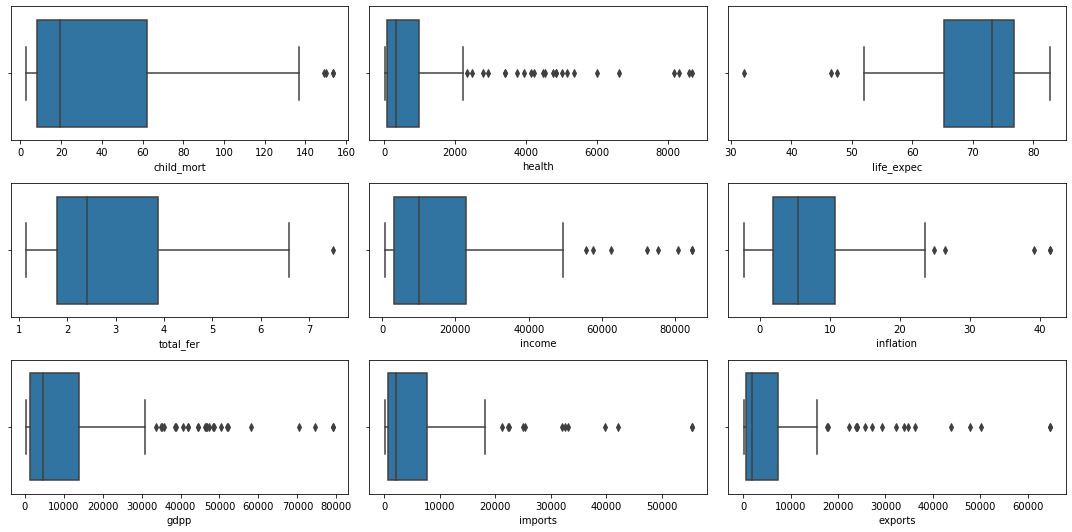

In [26]:
# Plot after Outlier removal 

fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(country_df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(country_df['health'], ax = axs[0,1])
plt3 = sns.boxplot(country_df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(country_df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(country_df['income'], ax = axs[1,1])
plt6 = sns.boxplot(country_df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(country_df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(country_df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(country_df['exports'], ax = axs[2,2])

plt.tight_layout()

In [27]:
# Dropping Country field as final dataframe will only contain data columns

df_country_drop = country_df.copy()
country = df_country_drop.pop('country')

In [28]:
df_country_drop.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


# 7. Hopkins Check

In [29]:
# Calculating Hopkins score to know whether the data is good for clustering or not.
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [30]:
#Let's check the Hopkins measure
hopkins(df_country_drop)

#Insight: Hopkins Statistic of .88 is a good score that indicated that the data is good for cluster analysis.

0.8715961027264524

# 8. Rescaling

In [31]:
# Rescaling

rfm_df = df_country_drop

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(167, 9)

In [32]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.565040,-0.598844,-0.851772,0.263649,-1.619092,1.902882,-0.702314
1,-0.547543,-0.473873,-0.439218,-0.413679,-0.387025,-0.375251,0.647866,-0.859973,-0.498775
2,-0.272548,-0.424015,-0.484826,-0.476198,-0.221124,1.123260,0.670423,-0.038404,-0.477483
3,2.084186,-0.381264,-0.532363,-0.464070,-0.612136,1.936405,-1.179234,2.128151,-0.531000
4,-0.709457,-0.086754,-0.178771,0.139659,0.125202,-0.768917,0.704258,-0.541946,-0.032079


# 9. K-means Modeling

### Finding the Optimal Number of Clusters - Elbow curve

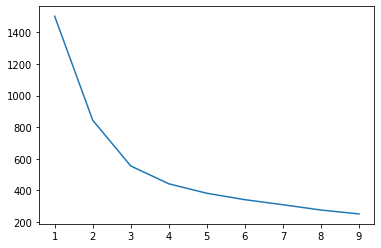

In [33]:
#let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(rfm_df_scaled)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

# Looking at the Elbow curve 3 clusters seems fine 

### Finding the Optimal Number of Clusters - Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [34]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
# We can have 4 or 5 clusters looking at the silhouette analysis

For n_clusters=2, the silhouette score is 0.46892827432316525
For n_clusters=3, the silhouette score is 0.40429358162123835
For n_clusters=4, the silhouette score is 0.3925532123104842
For n_clusters=5, the silhouette score is 0.38423097443267046
For n_clusters=6, the silhouette score is 0.2984936292340277
For n_clusters=7, the silhouette score is 0.3121327521008207
For n_clusters=8, the silhouette score is 0.2781483287916785


# 10. KMeans with the K the we have choosed

In [35]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
#displaying lables
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [37]:
# assign the label to dataframe
country_df['cluster_id'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [38]:
# Cross-check
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [39]:
# Check the count of observation per cluster
country_df['cluster_id'].value_counts()

1    90
2    48
0    29
Name: cluster_id, dtype: int64

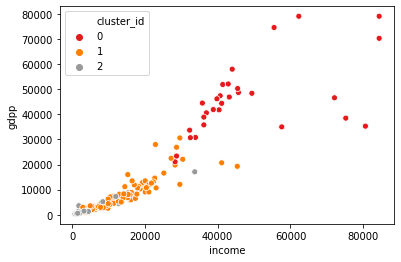

In [40]:
# Visualise clusters using income and gdpp variable
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = country_df, palette='Set1')

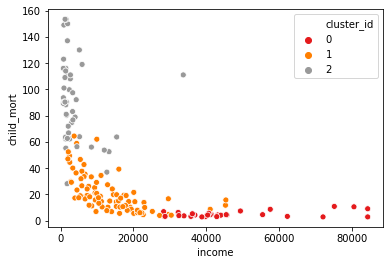

In [41]:
# Visualise clusters using income and child_mort variable
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_id', legend = 'full', data = country_df, palette='Set1')

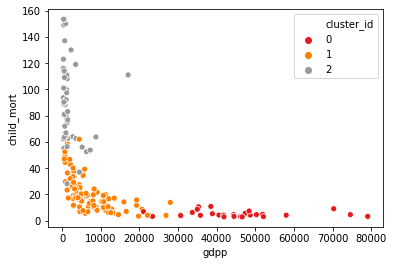

In [42]:
# Visualise clusters using gdpp and child_mort variable
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = country_df, palette='Set1')

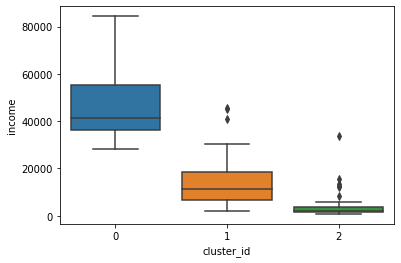

In [43]:
# Visualise clusters for income variable
sns.boxplot(x='cluster_id', y='income', data=country_df)

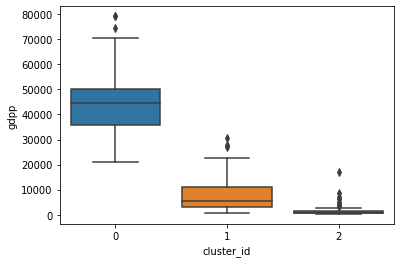

In [44]:
# Visualise clusters for gdpp variable
sns.boxplot(x='cluster_id', y='gdpp', data=country_df)

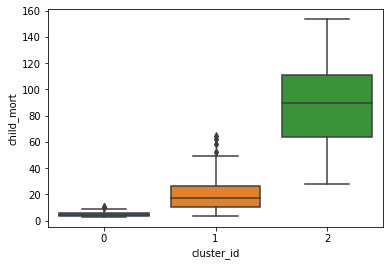

In [45]:
# Visualise clusters for child_mort variable
sns.boxplot(x='cluster_id', y='child_mort', data=country_df)

## 11. Cluster Profiling - K means

In [46]:
#display top 5 records
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [47]:
#getting mean values for each cluster
country_df.drop('country', axis = 1).groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,4.989655,25405.359310,4253.879655,21316.695862,47784.413793,2.906731,80.479310,1.754138,46068.137931
1,20.547778,3477.250726,528.894338,3589.291996,13804.333333,7.131624,73.393333,2.242444,7808.577778
2,90.335417,879.097657,114.821765,827.327888,3901.010000,10.608604,59.239583,4.992083,1911.400833


<b>From the above table it is evident that cluster 2 has the highest mortality rate and lowest income and gdpp. Hence, it is the ideal cluster for receiving help from the NGO.</b>

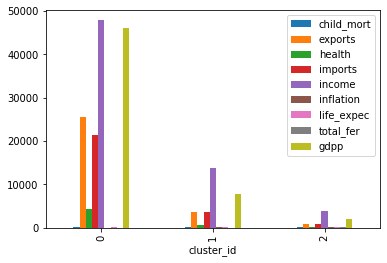

In [48]:
# Plotting bar graph with mean values for all metrics

country_df.drop('country', axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

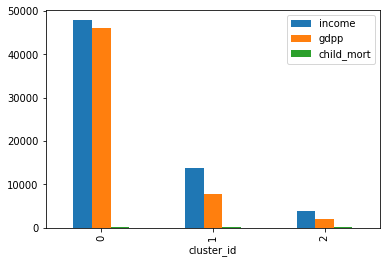

In [49]:
# Plotting bar graph with mean for income,gdpp and child_mort metrics
country_df.drop('country', axis = 1)[['income','gdpp','child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

In [50]:
#Let's use the concept of binning
country_df[country_df['cluster_id']==2]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [51]:
#Sorting the countries having minimum income, gdpp and high child mortality.

kmeans_final_cluster =country_df[country_df['cluster_id']==2].sort_values(by=['child_mort',"income", 'gdpp'], ascending=[False, True, True])
kmeans_final_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
132,Sierra Leone,153.4,67.032,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,2
66,Haiti,153.4,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.59,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.55,708.0,2


# 12. Hierarchical Clustering

In [52]:
#displying scaled metrics

rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.565040,-0.598844,-0.851772,0.263649,-1.619092,1.902882,-0.702314
1,-0.547543,-0.473873,-0.439218,-0.413679,-0.387025,-0.375251,0.647866,-0.859973,-0.498775
2,-0.272548,-0.424015,-0.484826,-0.476198,-0.221124,1.123260,0.670423,-0.038404,-0.477483
3,2.084186,-0.381264,-0.532363,-0.464070,-0.612136,1.936405,-1.179234,2.128151,-0.531000
4,-0.709457,-0.086754,-0.178771,0.139659,0.125202,-0.768917,0.704258,-0.541946,-0.032079


In [53]:
#display old country dataframe
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [54]:
#Remove cluster_id column before doing hierarchical clustering

country_df.drop(['cluster_id'],axis=1,inplace=True)

In [55]:
#Verifying that the cluster_id column is dropped

country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


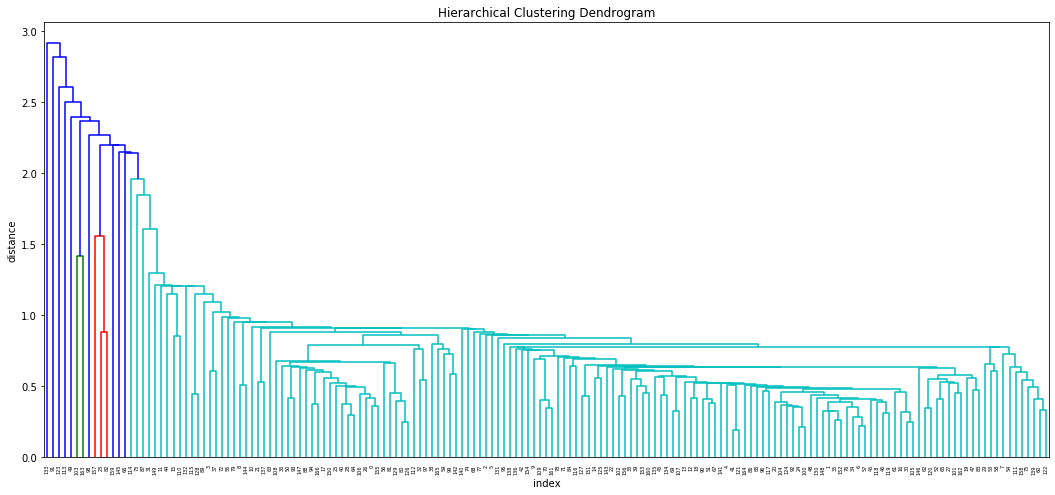

In [56]:
# single linkage
plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

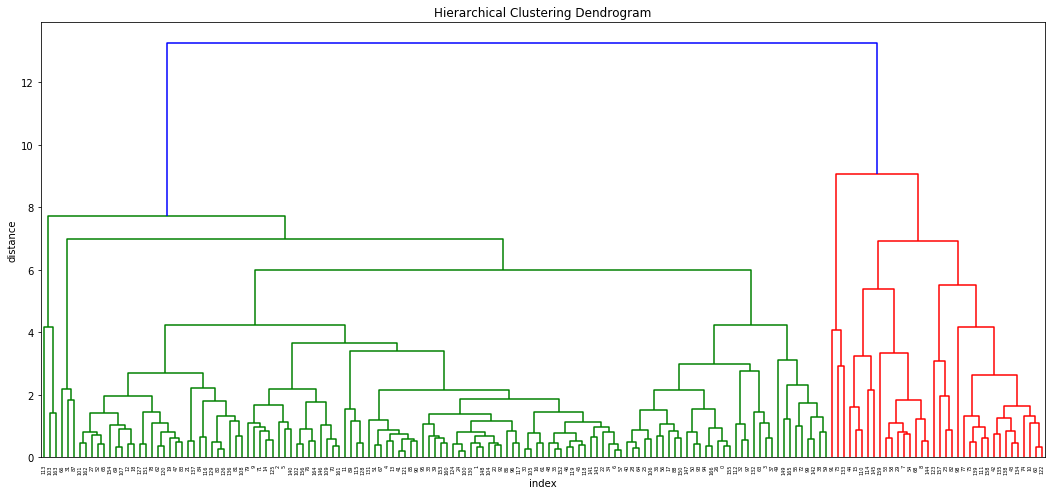

In [57]:
# complete linkage
plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [58]:
# We need approx 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0])

In [59]:
# assign cluster labels
country_df['cluster_labels'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [60]:
# Cross-check
country_df.isnull().sum()

country           0
child_mort        0
exports           0
health            0
imports           0
income            0
inflation         0
life_expec        0
total_fer         0
gdpp              0
cluster_labels    0
dtype: int64

In [61]:
# Check the count of observation per cluster
country_df['cluster_labels'].value_counts()

#The countries are not distributed properly in all the clusters.

0    128
1     33
3      3
2      3
Name: cluster_labels, dtype: int64

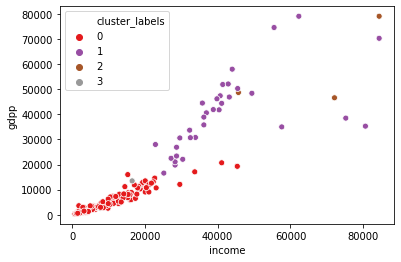

In [62]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = country_df, palette='Set1')

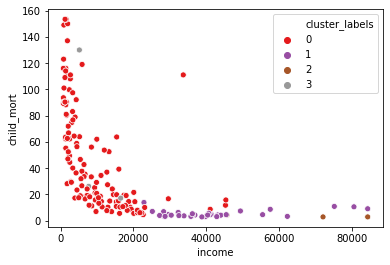

In [63]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = country_df, palette='Set1')

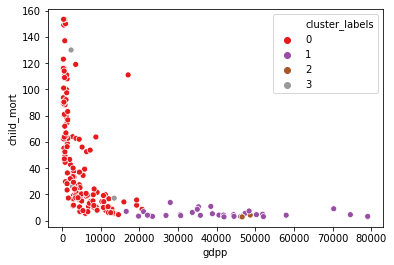

In [64]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = country_df, palette='Set1')

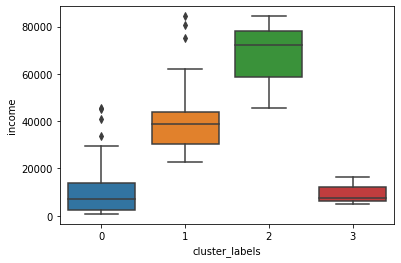

In [65]:
# Visualise clusters for income variable
sns.boxplot(x='cluster_labels', y='income', data=country_df)

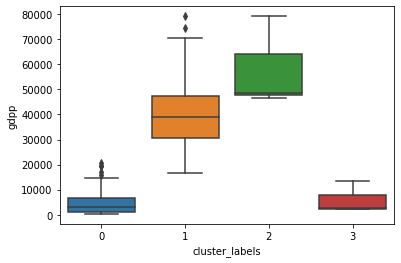

In [66]:
# Visualise clusters for gdpp variable
sns.boxplot(x='cluster_labels', y='gdpp', data=country_df)

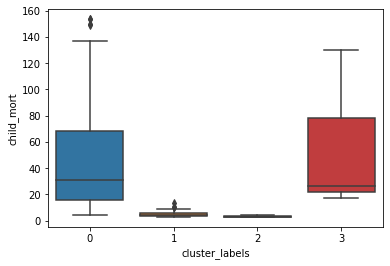

In [67]:
# Visualise clusters for child_mort variable
sns.boxplot(x='cluster_labels', y='child_mort', data=country_df)

# 13. Cluster Profiling - Hierarchical

In [68]:
#display top 5 records
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [69]:
#calculate the mean values for all metrics
country_df.drop('country', axis = 1).groupby('cluster_labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_labels,,,,,,,,,
0,46.652344,2184.696194,295.673470,2218.032408,9437.331875,7.999963,67.955469,3.270000,4762.025312
1,5.321212,18995.136364,3734.051818,16359.751515,41693.151515,2.666000,79.939394,1.756667,40245.090909
2,3.266667,59916.506667,4826.463333,50956.093333,67391.333333,0.408400,81.466667,1.610000,58129.333333
3,57.733333,1891.513333,308.380333,1427.990000,9786.666667,40.718667,67.366667,3.650000,6160.000000


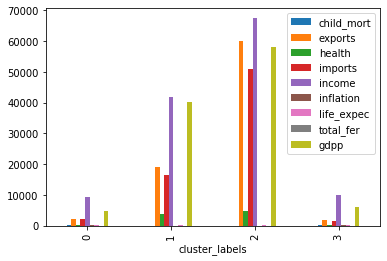

In [70]:
#Plot bar graph for all the metrics
country_df.drop('country', axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')

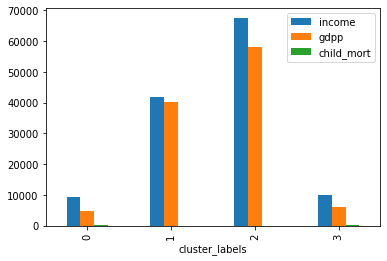

In [71]:
#Plot bar graph for income, gdpp and child mortality metrics
country_df.drop('country', axis = 1)[['income','gdpp','child_mort','cluster_labels']].groupby('cluster_labels').mean().plot(kind = 'bar')

In [72]:
#Let's use the concept of binning
country_df[country_df['cluster_labels']==0]['country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
161             Uzbekistan
162                Vanuatu
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 128, dtype: object

In [73]:
#Sort records using ascending order of income and gdpp and descending order of child mortality
country_df[country_df['cluster_labels']==0].sort_values(by=["income", 'gdpp','child_mort'], ascending=[True, True, False]) 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
88,Liberia,89.3,62.457000,38.5860,302.80200,742.24,5.47,60.8,5.02,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.4194,165.66400,742.24,20.80,57.5,6.54,334.00,0
26,Burundi,93.6,22.243716,26.7960,104.90964,764.00,12.30,57.7,6.26,331.62,0
112,Niger,123.0,77.256000,17.9568,170.86800,814.00,2.55,58.8,7.49,348.00,0
31,Central African Republic,149.0,52.628000,17.7508,118.19000,888.00,2.01,47.5,5.21,446.00,0
...,...,...,...,...,...,...,...,...,...,...,...
89,Libya,16.6,7937.600000,469.4800,5094.10000,29600.00,14.20,76.1,2.41,12100.00,0
49,Equatorial Guinea,111.0,14671.800000,766.0800,10071.90000,33700.00,24.90,60.9,5.21,17100.00,0
11,Bahrain,8.6,14386.500000,1028.7900,10536.30000,41100.00,7.44,76.0,2.16,20700.00,0
115,Oman,11.7,12680.100000,534.6100,7951.60000,45300.00,15.60,76.1,2.90,19300.00,0


# 14. Final Analysis

<b>We have analyzed both K-means and Hierarchial clustering and found clusters formed are not identical. The clusters formed in both the cases are not that great but its better in K-means as compared to Hierarchial. So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid.</b>

In [74]:
kmeans_final_cluster.describe()

#child_mort mean value is 20.5
#income mean value is 13804
#gdpp mean value is 7808.57


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.0
mean,90.335417,879.097657,114.821765,827.327888,3901.01000,10.608604,59.239583,4.992083,1911.400833,2.0
std,30.837001,2252.460730,165.518331,1540.837299,5588.02254,8.511174,6.384914,1.036192,2924.665715,0.0
min,28.100000,22.243716,12.821200,104.909640,742.24000,0.885000,32.100000,2.590000,331.620000,2.0
25%,63.675000,102.873750,34.005875,193.319500,1390.00000,4.080000,56.725000,4.475000,551.500000,2.0
50%,89.750000,196.260000,51.613500,339.306000,1860.00000,8.855000,59.800000,5.055000,932.000000,2.0
75%,111.000000,552.522500,95.303250,801.000000,3522.50000,16.600000,62.825000,5.597500,1465.000000,2.0
max,153.400000,14671.800000,766.080000,10071.900000,33700.00000,41.478000,71.100000,7.490000,17100.000000,2.0


In [76]:
#Filtering the final countries which have child mortality rate higher than the mean rate, income and gdpp lower than the mean values

kmeans_final_cluster[(kmeans_final_cluster.child_mort>20.5) & (kmeans_final_cluster.income<13804) & (kmeans_final_cluster.gdpp<7808)].country.head(10)

132                Sierra Leone
66                        Haiti
32                         Chad
31     Central African Republic
97                         Mali
113                     Nigeria
112                       Niger
3                        Angola
37             Congo, Dem. Rep.
25                 Burkina Faso
Name: country, dtype: object